# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [9]:
library ('tidyverse')
library ('ggrepel')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vaccine = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
                  col_types = cols())


In [ ]:
vaccine %>% head

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
df_vacc_rates = vaccine %>%
    filter(mmr >= 0) %>%
    group_by(state) %>%
    summarize(Vaccineover95 = sum(mmr >= 95, na.rm=TRUE)/n())

In [4]:
df_vacc_rates %>% head

state,Vaccineover95
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

ARKANSAS

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [8]:
ecdfstuff = vaccine %>%
    filter(state == 'North Carolina') %>%
    arrange(overall) %>%
    mutate(rn = row_number(), fraction = rn/max(rn))

Warning message:
“Ignoring unknown parameters: segement.curvature”


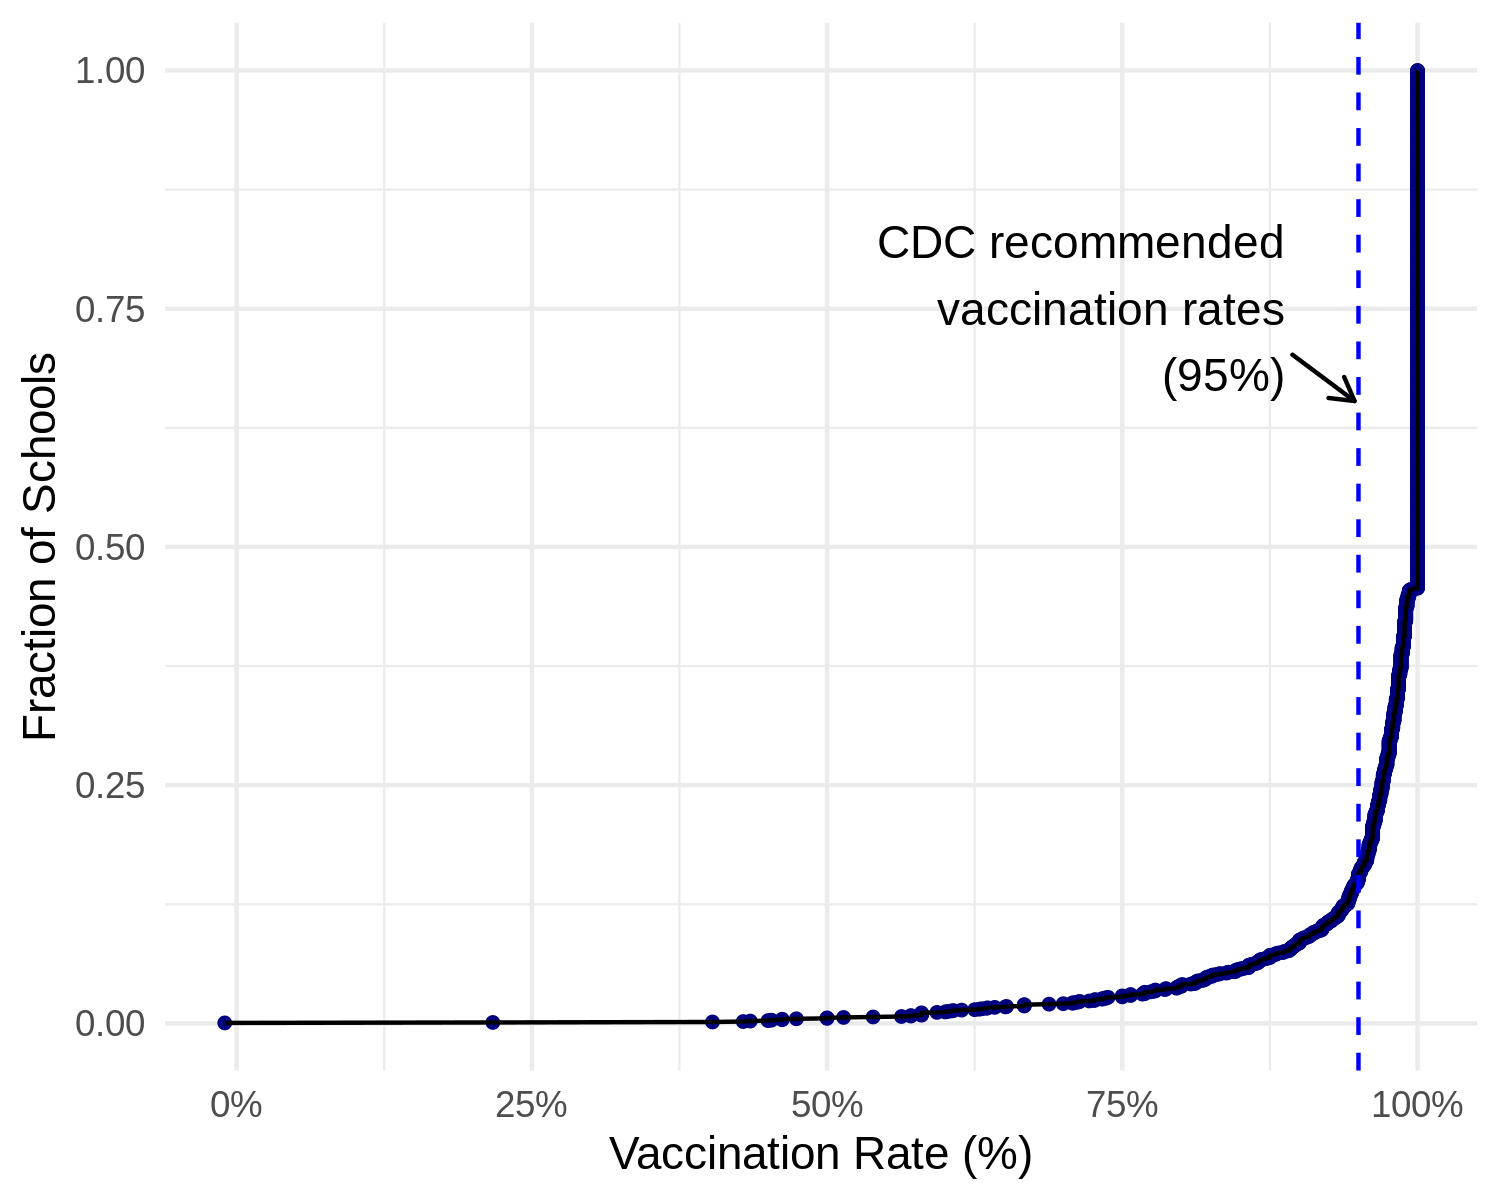

In [28]:
p = ggplot(ecdfstuff, aes(x=overall, y=fraction))

p = p + geom_point(size = 1, color = "Navy Blue") + geom_line()

p = p + labs(x="Vaccination Rate (%)", y="Fraction of Schools")

p = p + theme_minimal()

p = p + scale_x_continuous(labels = scales::label_percent(scale=1))

p = p + geom_vline(aes(xintercept = 95), linetype = "dashed", color = "Blue")

p = p + geom_text_repel(
    data = data.frame(overall= 95, fraction = 0.65),
    nudge_x = -7.5,
    nudge_y = 0.10,
    segement.curvature = 0.1,
    label = "CDC recommended\n vaccination rates\n (95%)",
    hjust = "right",
    arrow = arrow(length = unit(0.025, "npc"))
)

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [30]:
median = vaccine %>%
    summarize(median = median(overall))

median

median
<dbl>
87


NO